Load  data 

In [23]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv"


In [24]:
# Load the dataset
df = pd.read_csv(url)

In [25]:
# Display the first few rows of the dataset to understand its structure
print(df.head())


       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

In [26]:
# Check the number of rows before dropping null values in the "Price" column
original_count = len(df)

In [27]:
# Drop null values in the "Price" column and cast it to integer type
df_cleaned = df.dropna(subset=['Price'])
df_cleaned['Price'] = df_cleaned['Price'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_1668\4260049643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = df_cleaned['Price'].astype(int)


In [28]:
# Check the number of rows after dropping null values in the "Price" column
cleaned_count = len(df_cleaned)

In [29]:
# Calculate the percentage of data loss
data_loss_percentage = ((original_count - cleaned_count) / original_count) * 100


In [30]:
#1 
# Display the percentage of data loss
print(f"Percentage of data loss: {data_loss_percentage:.2f}%")

# Determine which statement is true based on the calculated data loss percentage
if data_loss_percentage > 70:
    print("Dropping all null values will lead to a loss of 74% of the data")
elif data_loss_percentage == 0:
    print("Dropping null values will not affect the data in the 'price' column since it has no null values")
elif data_loss_percentage > 20:
    print("Dropping all null values will lead to a loss of 21% of the data")
elif data_loss_percentage > 5:
    print("Dropping null values will lead to a loss of only 6% of the data, as the 'price' column has a low percentage of null values")
else:
    print("Data loss percentage does not match any of the provided statements.")


Percentage of data loss: 21.83%
Dropping all null values will lead to a loss of 21% of the data


In [31]:
# 2 Drop null values in the "Price" column and cast it to integer type
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

# Calculate the most common property type and its percentage
property_counts = df['Type'].value_counts()
most_common_property = property_counts.idxmax()
most_common_property_count = property_counts.max()
total_properties = property_counts.sum()
most_common_property_percentage = (most_common_property_count / total_properties) * 100

# Display the results
property_type_map = {'h': 'house', 'u': 'unit', 't': 'townhouse'}
most_common_property_type = property_type_map.get(most_common_property, most_common_property)
print(f"The most common type of property is {most_common_property_type}s and they represent {most_common_property_percentage:.2f}% of the properties.")

The most common type of property is houses and they represent 67.79% of the properties.


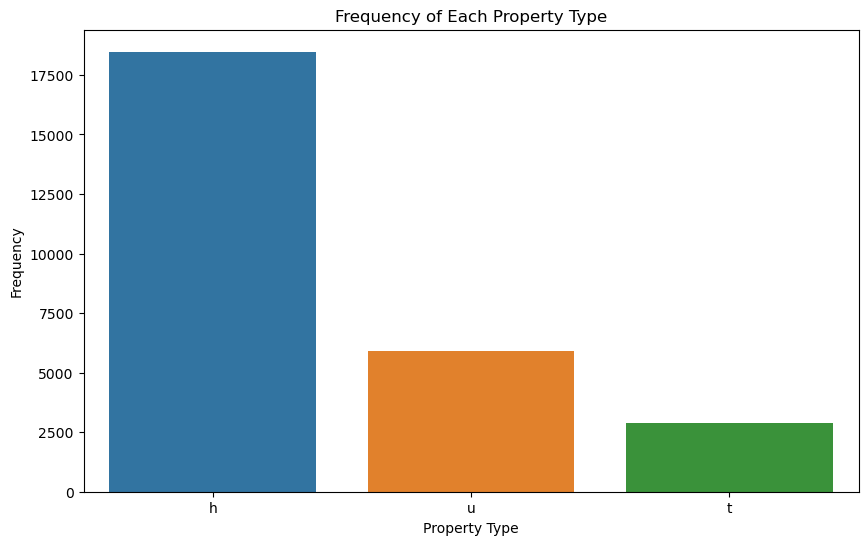

In [32]:
#3 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, order=property_counts.index)
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.title('Frequency of Each Property Type')
plt.show()

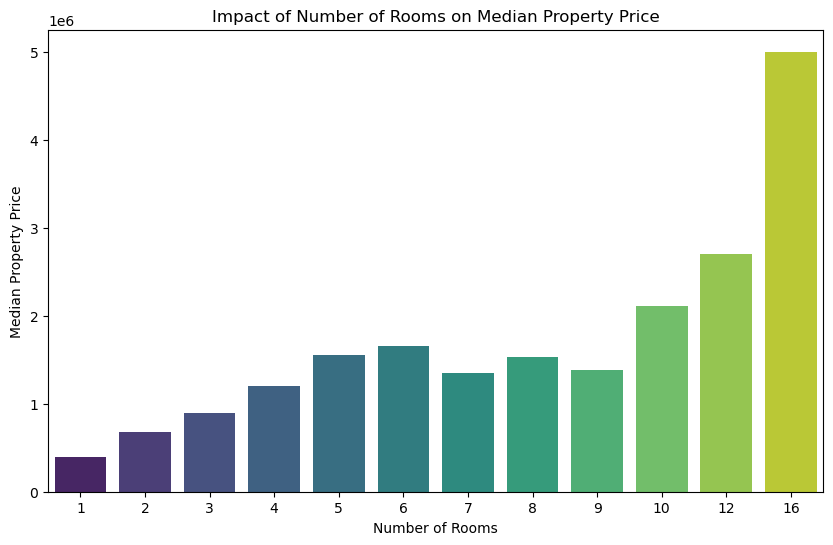

In [18]:
#4 Calculate the median property price for each number of rooms
median_prices = df.groupby('Rooms')['Price'].median().reset_index()

# Create a bar chart to show the median property price for each number of rooms
plt.figure(figsize=(10, 6))
sns.barplot(x='Rooms', y='Price', data=median_prices, palette='viridis')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Property Price')
plt.title('Impact of Number of Rooms on Median Property Price')
plt.show()

In [33]:
# Print the median prices for interpretation
print(median_prices)

    Rooms      Price
0       1   390000.0
1       2   678000.0
2       3   900000.0
3       4  1205250.0
4       5  1550000.0
5       6  1660000.0
6       7  1350000.0
7       8  1535883.0
8       9  1380000.0
9      10  2115000.0
10     12  2705000.0
11     16  5000000.0


In [34]:
from scipy.stats import spearmanr

In [35]:
#5  Calculate the Spearman correlation coefficient
spearman_corr, p_value = spearmanr(df['Price'], df['Rooms'])

# Display the results
print(f"Spearman correlation coefficient: {spearman_corr:.2f}")
print(f"P-value: {p_value:.2e}")

# Interpretation based on the Spearman correlation coefficient
if spearman_corr > 0.7:
    interpretation = "The correlation between property price and number of rooms is strong."
elif spearman_corr > 0.4:
    interpretation = "The correlation between property price and number of rooms is moderate."
elif spearman_corr > 0.1:
    interpretation = "The correlation between property price and number of rooms is weak."
else:
    interpretation = "There is no correlation between property price and number of rooms."

print(interpretation)

Spearman correlation coefficient: 0.50
P-value: 0.00e+00
The correlation between property price and number of rooms is moderate.


In [37]:
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


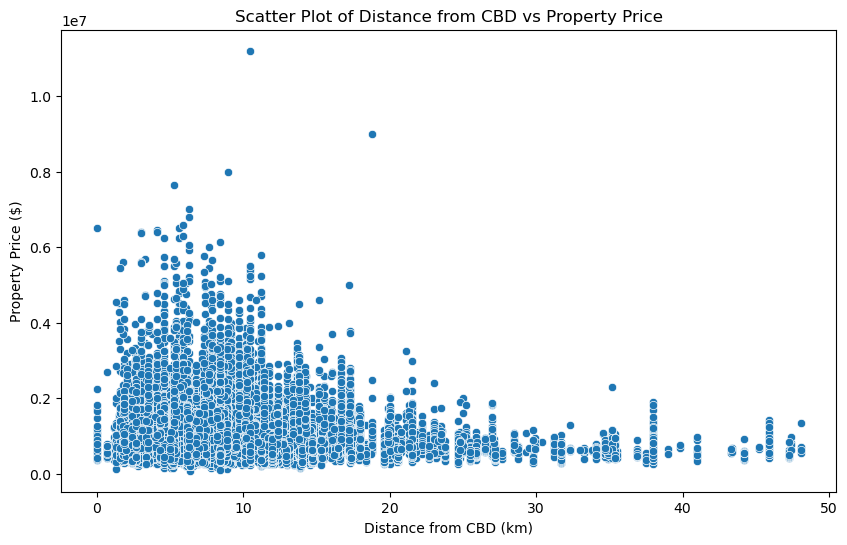

Pearson correlation coefficient: -0.21


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'price' or 'distance' columns
df = df.dropna(subset=['Price', 'Distance'])

# Convert 'price' column to integer type
df['Price'] = df['Price'].astype(int)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Scatter Plot of Distance from CBD vs Property Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price ($)')
plt.show()

# Calculate the Pearson correlation coefficient
correlation = df[['Distance', 'Price']].corr().loc['Distance', 'Price']
print(f'Pearson correlation coefficient: {correlation:.2f}')


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


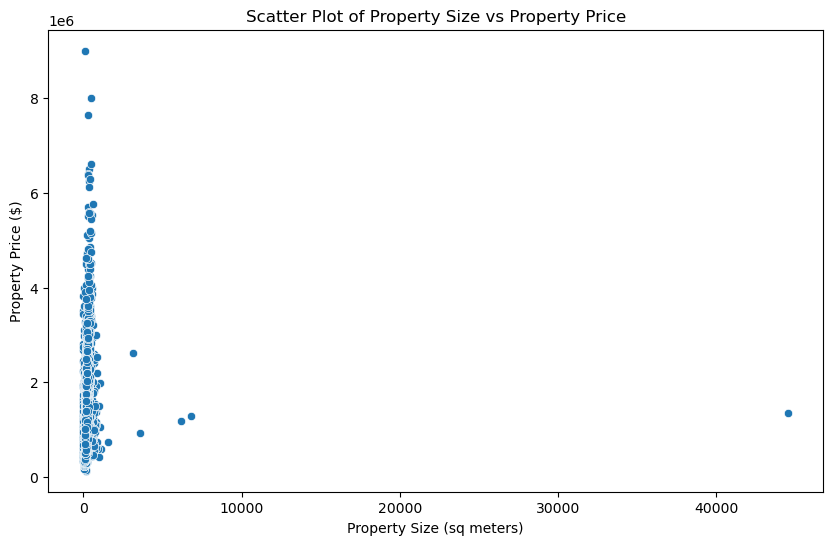

Pearson correlation coefficient: 0.10


In [40]:
#8
# Display the column names to find the correct names for property size and price
print(df.columns)

# Replace 'property size' and 'price' with the correct column names if they are different
# Example column names used here are 'BuildingArea' for property size and 'Price' for price
df = df.dropna(subset=['BuildingArea', 'Price'])

# Convert 'Price' column to integer type
df['Price'] = df['Price'].astype(int)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BuildingArea', y='Price', data=df)
plt.title('Scatter Plot of Property Size vs Property Price')
plt.xlabel('Property Size (sq meters)')
plt.ylabel('Property Price ($)')
plt.show()

# Calculate the Pearson correlation coefficient
correlation = df[['BuildingArea', 'Price']].corr().loc['BuildingArea', 'Price']
print(f'Pearson correlation coefficient: {correlation:.2f}')


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Landsize_quantile'],
      dtype='object')


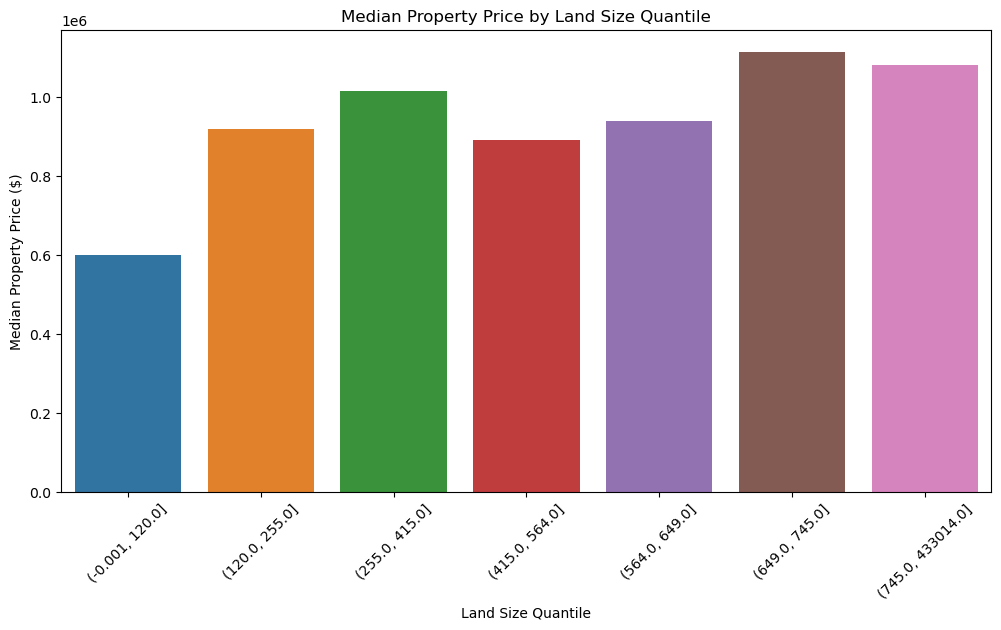

In [42]:
#8


# Display the column names to find the correct names for land size and price
print(df.columns)

# Replace 'Landsize' and 'Price' with the correct column names if they are different
df = df.dropna(subset=['Landsize', 'Price'])

# Convert 'Price' column to integer type
df['Price'] = df['Price'].astype(int)

# Discretize the 'Landsize' column into quantiles
df['Landsize_quantile'] = pd.qcut(df['Landsize'], q=7)

# Calculate the median property price for each quantile
median_prices = df.groupby('Landsize_quantile')['Price'].median().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Landsize_quantile', y='Price', data=median_prices)
plt.title('Median Property Price by Land Size Quantile')
plt.xlabel('Land Size Quantile')
plt.ylabel('Median Property Price ($)')
plt.xticks(rotation=45)
plt.show()


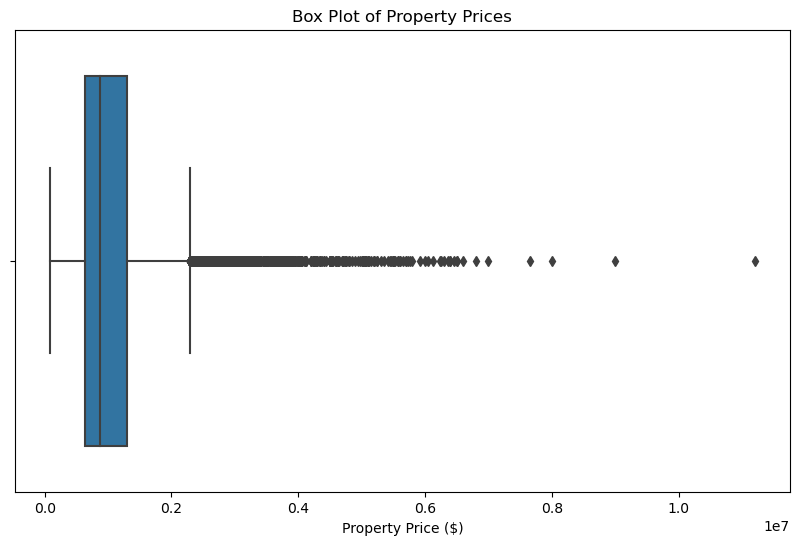

Percentage of properties identified as outliers: 4.69%


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' column and convert to integer
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

# Create a box plot to visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Property Prices')
plt.xlabel('Property Price ($)')
plt.show()

# Calculate Tukey's method thresholds
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new dataframe without outliers
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Calculate the percentage of outliers
num_outliers = len(df) - len(df_no_outliers)
total_properties = len(df)
percentage_outliers = (num_outliers / total_properties) * 100

print(f'Percentage of properties identified as outliers: {percentage_outliers:.2f}%')


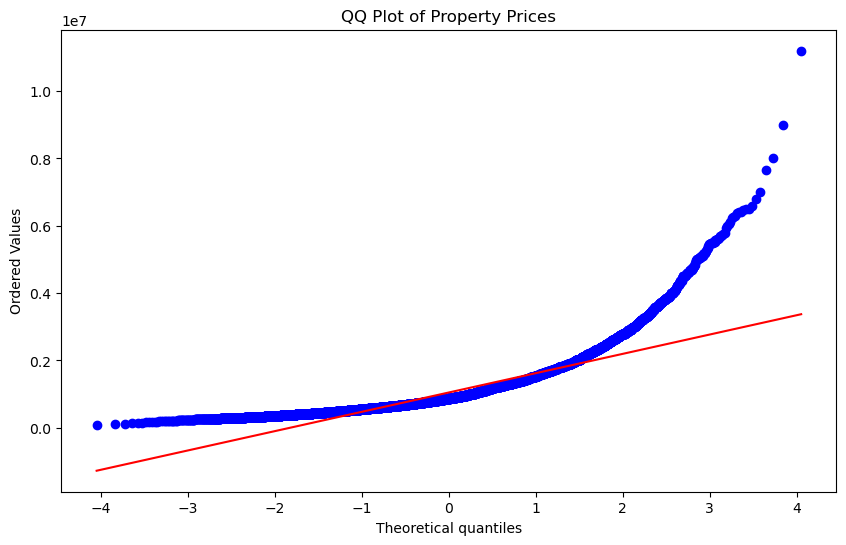

Skewness: 2.59
Kurtosis: 13.09


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' column and convert to integer
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

# Create a QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.show()

# Calculate skewness and kurtosis
skewness = stats.skew(df['Price'])
kurtosis = stats.kurtosis(df['Price'])

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')


In [46]:
#11
import pandas as pd
import scipy.stats as stats

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' column and convert to integer
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(df['Price'], 'norm', args=(df['Price'].mean(), df['Price'].std()))

print(f'Kolmogorov-Smirnov test statistic: {ks_statistic:.4f}')
print(f'p-value: {p_value:.4f}')


Kolmogorov-Smirnov test statistic: 0.1375
p-value: 0.0000


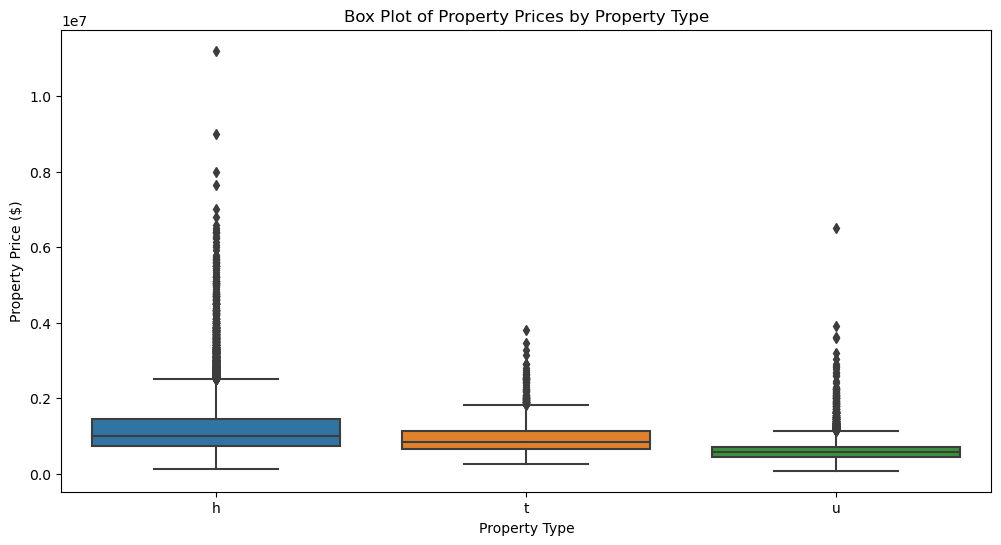

In [47]:
#12 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' or 'Type' column
df = df.dropna(subset=['Price', 'Type'])

# Convert 'Price' column to integer type
df['Price'] = df['Price'].astype(int)

# Create a box plot to compare property prices by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=df)
plt.title('Box Plot of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price ($)')
plt.show()


In [48]:
#13
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' or 'Regionname' column
df = df.dropna(subset=['Price', 'Regionname'])

# Convert 'Price' column to integer type
df['Price'] = df['Price'].astype(int)

# Calculate median price by region
median_prices_by_region = df.groupby('Regionname')['Price'].median().reset_index()

# Find the region with the highest and lowest median prices
most_expensive_region = median_prices_by_region.loc[median_prices_by_region['Price'].idxmax()]
cheapest_region = median_prices_by_region.loc[median_prices_by_region['Price'].idxmin()]

print(f'Most expensive region: {most_expensive_region["Regionname"]}, Median Price: ${most_expensive_region["Price"]}')
print(f'Cheapest region: {cheapest_region["Regionname"]}, Median Price: ${cheapest_region["Price"]}')


Most expensive region: Southern Metropolitan, Median Price: $1250000.0
Cheapest region: Western Victoria, Median Price: $412125.0


In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' or 'Regionname' column
df = df.dropna(subset=['Price', 'Regionname'])

# Convert 'Price' column to integer type
df['Price'] = df['Price'].astype(int)

# Divide 'Price' into five distinct ranges
bins = [0, 200000, 400000, 600000, 800000, np.inf]
labels = ['<200K', '200K-400K', '400K-600K', '600K-800K', '>800K']
df['PriceRange'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Create a contingency table
contingency_table = pd.crosstab(df['Regionname'], df['PriceRange'])


In [51]:
# Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square statistic: {chi2_stat:.4f}')
print(f'p-value: {p_value:.4f}')


Chi-Square statistic: 3259.4230
p-value: 0.0000


In [52]:
# Calculate Cramer's V
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2_stat / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r - 1, k - 1))

print(f'Cramer\'s V: {cramers_v:.4f}')


Cramer's V: 0.1729


In [49]:

import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Price' or 'Date' column
df = df.dropna(subset=['Price', 'Date'])

# Convert 'Price' column to integer type and 'Date' column to datetime
df['Price'] = df['Price'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate median price by year
median_prices_by_year = df.groupby('Year')['Price'].median().reset_index()

# Find the earliest and latest year
earliest_year = median_prices_by_year['Year'].min()
latest_year = median_prices_by_year['Year'].max()

# Get median prices for the earliest and latest years
median_price_earliest = median_prices_by_year.loc[median_prices_by_year['Year'] == earliest_year, 'Price'].values[0]
median_price_latest = median_prices_by_year.loc[median_prices_by_year['Year'] == latest_year, 'Price'].values[0]

# Calculate percentage change
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

print(f'Percentage increase/decrease in median price from {earliest_year} to {latest_year}: {percentage_change:.2f}%')


Percentage increase/decrease in median price from 2016 to 2018: -5.48%


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/

In [53]:
#16
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

# Drop rows with null values in 'Date' or 'Type' column
df = df.dropna(subset=['Date', 'Type'])

# Convert 'Date' column to datetime and 'Type' to categorical
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Type'] = df['Type'].astype('category')

# Filter the dataset for houses only
houses_df = df[df['Type'] == 'House']

# Extract the month from the 'Date' column
houses_df['Month'] = houses_df['Date'].dt.month

# Count the number of houses sold each month
monthly_sales = houses_df['Month'].value_counts().sort_index()

# Map month numbers to month names for better readability
monthly_sales.index = monthly_sales.index.map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

print(monthly_sales)


Series([], Name: Month, dtype: int64)


c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\anaconda3\anaconda 4\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/04/2016' in DD/